In [144]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import dates
from matplotlib import ticker
import numpy as np

In [145]:
f = open('4.json')

data = json.load(f)

df = pd.DataFrame(data)

df.head()

,accuracy,altitude,lat,lng,speed,speedAccuracy,ts
0,7.681,810.100037,-23.770083,-46.678854,0.007624,0.007624,1691511018257
1,7.431,810.100037,-23.770083,-46.678855,0.004007,0.004007,1691511018765
2,7.335,810.100037,-23.770083,-46.678855,0.003034,0.003034,1691511019272
3,7.131,810.100037,-23.770083,-46.678855,0.001683,0.001683,1691511020288
4,7.143,810.100037,-23.770083,-46.678855,0.001201,0.001201,1691511020796


In [146]:
df['ts'] = df['ts'].astype(str)

In [147]:
parse_ts = lambda timestamp: datetime.fromtimestamp(int(timestamp[:-3])) if (int(timestamp[-3:]) < 500) else datetime.fromtimestamp(int(timestamp[:-3])+1)

In [148]:
df['ds'] = df['ts'].apply(parse_ts)

In [149]:
df

,accuracy,altitude,lat,lng,speed,speedAccuracy,ts,ds
0,7.681000,810.100037,-23.770083,-46.678854,0.007624,0.007624,1691511018257,2023-08-08 13:10:18
1,7.431000,810.100037,-23.770083,-46.678855,0.004007,0.004007,1691511018765,2023-08-08 13:10:19
2,7.335000,810.100037,-23.770083,-46.678855,0.003034,0.003034,1691511019272,2023-08-08 13:10:19
3,7.131000,810.100037,-23.770083,-46.678855,0.001683,0.001683,1691511020288,2023-08-08 13:10:20
4,7.143000,810.100037,-23.770083,-46.678855,0.001201,0.001201,1691511020796,2023-08-08 13:10:21
...,...,...,...,...,...,...,...,...
6386,39.875000,810.100037,-23.770006,-46.678783,0.083829,0.083829,1691518205236,2023-08-08 15:10:05
6387,32.779999,810.100037,-23.770006,-46.678784,0.051635,0.051635,1691518206234,2023-08-08 15:10:06
6388,32.030998,810.100037,-23.770007,-46.678784,0.038019,0.038019,1691518206530,2023-08-08 15:10:07
6389,31.488001,810.100037,-23.770007,-46.678784,0.013072,0.013072,1691518207228,2023-08-08 15:10:07


In [150]:
df['hr'] = pd.to_datetime(df.ds.values) - datetime(2023, 8, 8, 3, 0, 0)
df

,accuracy,altitude,lat,lng,speed,speedAccuracy,ts,ds,hr
0,7.681000,810.100037,-23.770083,-46.678854,0.007624,0.007624,1691511018257,2023-08-08 13:10:18,0 days 10:10:18
1,7.431000,810.100037,-23.770083,-46.678855,0.004007,0.004007,1691511018765,2023-08-08 13:10:19,0 days 10:10:19
2,7.335000,810.100037,-23.770083,-46.678855,0.003034,0.003034,1691511019272,2023-08-08 13:10:19,0 days 10:10:19
3,7.131000,810.100037,-23.770083,-46.678855,0.001683,0.001683,1691511020288,2023-08-08 13:10:20,0 days 10:10:20
4,7.143000,810.100037,-23.770083,-46.678855,0.001201,0.001201,1691511020796,2023-08-08 13:10:21,0 days 10:10:21
...,...,...,...,...,...,...,...,...,...
6386,39.875000,810.100037,-23.770006,-46.678783,0.083829,0.083829,1691518205236,2023-08-08 15:10:05,0 days 12:10:05
6387,32.779999,810.100037,-23.770006,-46.678784,0.051635,0.051635,1691518206234,2023-08-08 15:10:06,0 days 12:10:06
6388,32.030998,810.100037,-23.770007,-46.678784,0.038019,0.038019,1691518206530,2023-08-08 15:10:07,0 days 12:10:07
6389,31.488001,810.100037,-23.770007,-46.678784,0.013072,0.013072,1691518207228,2023-08-08 15:10:07,0 days 12:10:07


In [151]:
df['hr'] = df['hr'].astype(str)

In [152]:
df['hr'] = df['hr'].str[-8:]

In [153]:
df['ds'] = pd.to_datetime(df['hr'])

/tmp/ipykernel_265846/1204105097.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['hr'])


In [154]:
df.drop(['hr', 'ts'], inplace=True, axis=1)

In [155]:
df.sort_values('ds')

,accuracy,altitude,lat,lng,speed,speedAccuracy,ds
0,7.681000,810.100037,-23.770083,-46.678854,0.007624,0.007624,2023-08-10 10:10:18
1,7.431000,810.100037,-23.770083,-46.678855,0.004007,0.004007,2023-08-10 10:10:19
2,7.335000,810.100037,-23.770083,-46.678855,0.003034,0.003034,2023-08-10 10:10:19
3,7.131000,810.100037,-23.770083,-46.678855,0.001683,0.001683,2023-08-10 10:10:20
4,7.143000,810.100037,-23.770083,-46.678855,0.001201,0.001201,2023-08-10 10:10:21
...,...,...,...,...,...,...,...
6386,39.875000,810.100037,-23.770006,-46.678783,0.083829,0.083829,2023-08-10 12:10:05
6387,32.779999,810.100037,-23.770006,-46.678784,0.051635,0.051635,2023-08-10 12:10:06
6389,31.488001,810.100037,-23.770007,-46.678784,0.013072,0.013072,2023-08-10 12:10:07
6388,32.030998,810.100037,-23.770007,-46.678784,0.038019,0.038019,2023-08-10 12:10:07


In [156]:
df = df[['ds']]

In [157]:
group = df.groupby([df.ds.dt.hour, df.ds.dt.minute])

In [158]:
new_df_index = pd.date_range(
    start=pd.to_datetime("2023-08-10 10:10:18"),
    end=pd.to_datetime("2023-08-10 12:10:08"),
    freq='S'
)
new_df_index

DatetimeIndex(['2023-08-10 10:10:18', '2023-08-10 10:10:19',
               '2023-08-10 10:10:20', '2023-08-10 10:10:21',
               '2023-08-10 10:10:22', '2023-08-10 10:10:23',
               '2023-08-10 10:10:24', '2023-08-10 10:10:25',
               '2023-08-10 10:10:26', '2023-08-10 10:10:27',
               ...
               '2023-08-10 12:09:59', '2023-08-10 12:10:00',
               '2023-08-10 12:10:01', '2023-08-10 12:10:02',
               '2023-08-10 12:10:03', '2023-08-10 12:10:04',
               '2023-08-10 12:10:05', '2023-08-10 12:10:06',
               '2023-08-10 12:10:07', '2023-08-10 12:10:08'],
              dtype='datetime64[ns]', length=7191, freq='S')

In [159]:
new_df = pd.DataFrame({'expected': np.ones(len(new_df_index))}, index=new_df_index)
new_df

,expected
2023-08-10 10:10:18,1.0
2023-08-10 10:10:19,1.0
2023-08-10 10:10:20,1.0
2023-08-10 10:10:21,1.0
2023-08-10 10:10:22,1.0
...,...
2023-08-10 12:10:04,1.0
2023-08-10 12:10:05,1.0
2023-08-10 12:10:06,1.0
2023-08-10 12:10:07,1.0


In [160]:
new_df.reset_index(inplace=True)

In [161]:
new_df.columns = ['ds', 'ex']

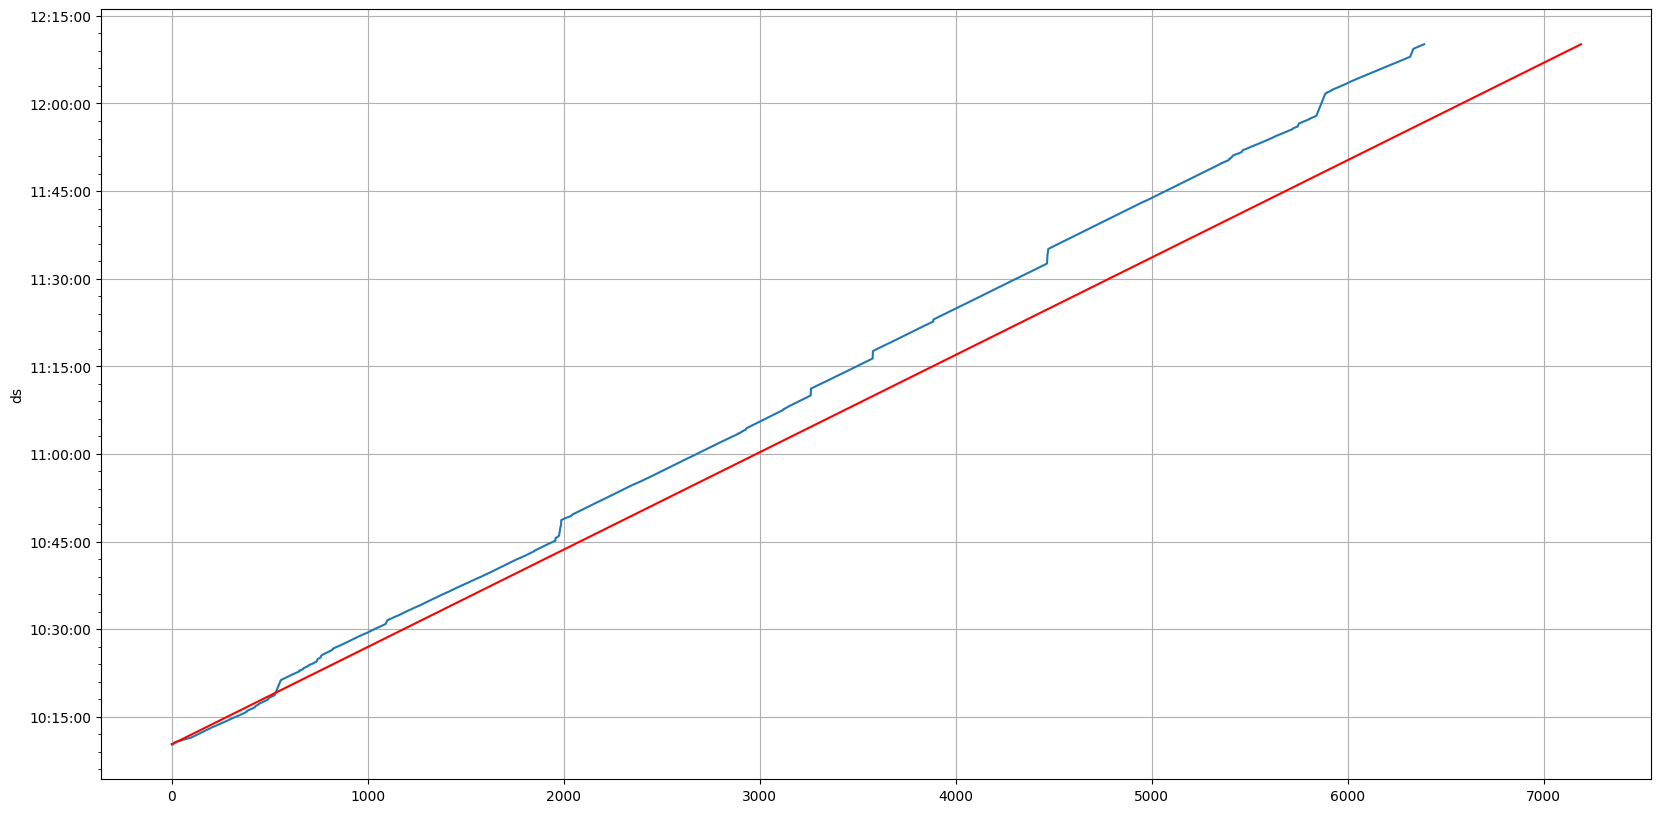

In [162]:
plt.figure(figsize=(20,10))

g = sns.lineplot(data=df, y='ds', x=df.index)
g = sns.lineplot(data=new_df, y='ds', x=new_df.index, color='red')

formatter = dates.DateFormatter('%H:%M:%S')

g.yaxis.set_major_formatter(formatter)
g.yaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))

plt.grid()
plt.show()